In [98]:
from keras import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.utils import to_categorical

In [99]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [100]:
print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

(28, 28)
784


In [101]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_part = train_data.astype('float')
test_part = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [102]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2919 - accuracy: 0.9107 - val_loss: 0.1437 - val_accuracy: 0.9558
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1009 - accuracy: 0.9686 - val_loss: 0.1028 - val_accuracy: 0.9669
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0624 - accuracy: 0.9803 - val_loss: 0.0737 - val_accuracy: 0.9771
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.1149 - val_accuracy: 0.9657
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0735 - val_accuracy: 0.9786
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0656 - val_accuracy: 0.9811

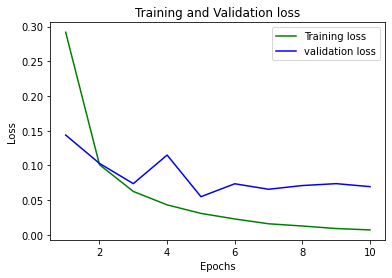

In [103]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train,'g', label='Training loss')
plt.plot(epochs, loss_val,'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

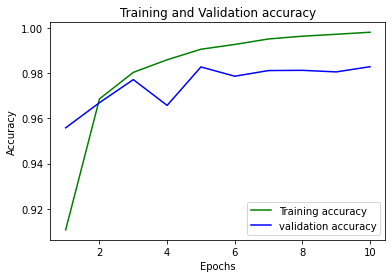

In [104]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train,'g', label='Training accuracy')
plt.plot(epochs, acc_val,'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

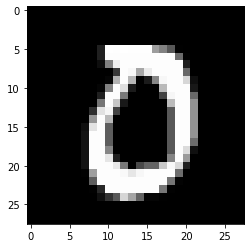

In [105]:
import random
i = random.randint(0,28)
plt.imshow(test_images[i], cmap='gray')
plt.show()

In [106]:
train_image = test_images[i]
mapping = {0:"0", 1:"1", 2:"2", 3:"3", 4:"4", 5:"5", 6:"6", 7:"7", 8:"8", 9:"9"}
output = model.predict(train_image.reshape(1,784))
print("\n\nFinal Output: {}".format(np.argmax(output)))

1/1 [==============================] - 0s 40ms/step


Final Output: 0


In [107]:
model_1 = Sequential()
model_1.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(256, activation='tanh'))
model_1.add(Dense(128, activation='tanh'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 22ms/step - loss: 0.2963 - accuracy: 0.9076 - val_loss: 0.1589 - val_accuracy: 0.9498
Epoch 2/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0956 - accuracy: 0.9705 - val_loss: 0.1872 - val_accuracy: 0.9411
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.1381 - val_accuracy: 0.9566
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.1013 - val_accuracy: 0.9696
Epoch 5/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0684 - val_accuracy: 0.9816
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0738 - val_accuracy: 0.9796
Epoch 7/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0653 - val_accuracy: 0.9835

In [108]:
model_1 = Sequential()
model_1.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(256, activation='sigmoid'))
model_1.add(Dense(128, activation='sigmoid'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 22ms/step - loss: 0.5979 - accuracy: 0.8265 - val_loss: 0.2275 - val_accuracy: 0.9321
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1594 - accuracy: 0.9532 - val_loss: 0.1684 - val_accuracy: 0.9470
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0991 - accuracy: 0.9710 - val_loss: 0.0856 - val_accuracy: 0.9741
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0910 - val_accuracy: 0.9732
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0849 - val_accuracy: 0.9772
Epoch 7/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0730 - val_accuracy: 0.9792

In [109]:
model_3 = Sequential()
model_3.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3.fit(train_part, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_part, test_labels_one_hot))


Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 4.6729 - accuracy: 0.8812 - val_loss: 1.2433 - val_accuracy: 0.8836
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.4164 - accuracy: 0.9463 - val_loss: 0.4160 - val_accuracy: 0.9413
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2432 - accuracy: 0.9605 - val_loss: 0.3694 - val_accuracy: 0.9484
Epoch 4/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1859 - accuracy: 0.9676 - val_loss: 0.3354 - val_accuracy: 0.9467
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1553 - accuracy: 0.9726 - val_loss: 0.2883 - val_accuracy: 0.9575
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1421 - accuracy: 0.9750 - val_loss: 0.2871 - val_accuracy: 0.9610
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1371 - accuracy: 0.9788 - val_loss: 0.2851 - val_accuracy: 0.9633